![Image](./img/dataset-diagram-logo.png)


**objectif** : pandas like but for **ndim**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
truc = xr.DataArray(np.random.randint(2, 3))
truc

<xarray.DataArray ()>
array(2)

In [3]:
data = xr.DataArray(np.random.randint(6, size=(2, 3)), coords={'x': ['a', 'b']}, dims=('x', 'y'))
data

<xarray.DataArray (x: 2, y: 3)>
array([[1, 2, 2],
       [2, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [4]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Attribute of DataArray

In [5]:
print('values : ', data.values)
print('dims : ', data.dims)
print('coords : ', data.coords)
print('attrs metadata', data.attrs)

values :  [[1 2 2]
 [2 4 5]]
dims :  ('x', 'y')
coords :  Coordinates:
  * x        (x) <U1 'a' 'b'
attrs metadata {}


## Indexing

### numpy like

In [6]:
data[:, :2]

<xarray.DataArray (x: 2, y: 2)>
array([[1, 2],
       [2, 4]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### pandas like with loc[]

In [7]:
data.loc[['a', 'b'], :]

<xarray.DataArray (x: 2, y: 3)>
array([[1, 2, 2],
       [2, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with isel()

In [8]:
data.isel(y=[0, 2])

<xarray.DataArray (x: 2, y: 2)>
array([[1, 2],
       [2, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with sel()

In [9]:
data.sel(x=['a'])

<xarray.DataArray (x: 1, y: 3)>
array([[1, 2, 2]])
Coordinates:
  * x        (x) <U1 'a'
Dimensions without coordinates: y

## Attributes (metadata) usefull for protting

In [10]:
data.attrs['long_name'] = 'random unseless stuff'
data.attrs['units'] = 'mV'
data

<xarray.DataArray (x: 2, y: 3)>
array([[1, 2, 2],
       [2, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

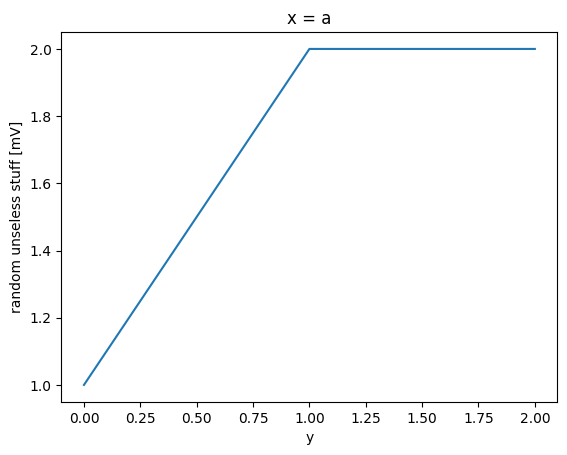

In [15]:
data.sel(x='a').plot()

## Computation / aggregation

In [16]:
# mais on peut utiliser les noms des axes au lieu de leur numéro
data.mean(dim='y')

<xarray.DataArray (x: 2)>
array([1.66666667, 3.66666667])
Coordinates:
  * x        (x) <U1 'a' 'b'

## GroupBy

In [20]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[1, 2, 2],
       [2, 4, 5]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [21]:
labels = xr.DataArray(['E', 'F', 'E'], coords = [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [22]:
data1 = data.groupby(labels).sum('y')
data1

<xarray.DataArray (x: 2, labels: 2)>
array([[3, 2],
       [7, 4]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * labels   (labels) object 'E' 'F'
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [23]:
data2 = data.groupby(labels).apply(lambda x: x - x.min())
data2

<xarray.DataArray (x: 2, y: 3)>
array([[0, 0, 1],
       [1, 2, 4]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Pandas

In [24]:
series = data.to_series()
series

x  y
a  0    1
   1    2
   2    2
b  0    2
   1    4
   2    5
dtype: int64

In [25]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[1, 2, 2],
       [2, 4, 5]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

## Dataset = DataArray in the same place

In [26]:
times = np.arange(0, 10, 0.01)
freqs = np.arange(10, 50, 2.)

data1 = xr.DataArray(np.random.randn(times.size),
                     coords={'times': times},
                     dims=('times'))

data2 = xr.DataArray(np.random.randn(times.size, freqs.size),
                     coords={'times': times, 'freqs': freqs},
                     dims=('times', 'freqs'))



ds = xr.Dataset({'raw_signal': data1,
                 'time_freq' : data2,
                 'one_scalar': np.pi})
ds

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 -1.998 0.1774 -1.345 ... -0.2435 0.5607 1.917
    time_freq   (times, freqs) float64 -1.611 -0.87 -0.7066 ... 0.8247 0.3565
    one_scalar  float64 3.142

In [27]:
ds['raw_signal']

<xarray.DataArray 'raw_signal' (times: 1000)>
array([-1.99820756e+00,  1.77433305e-01, -1.34543878e+00,  1.87692458e+00,
        6.34867328e-02, -1.85648596e+00,  1.30596310e+00, -1.04369004e+00,
        4.06586418e-02, -2.27450253e+00,  4.16026041e-01, -2.10344892e+00,
        6.60122635e-02,  5.09347364e-01,  6.77843446e-01, -1.28138840e+00,
        8.89893784e-01,  9.88079424e-01, -1.00385817e+00,  4.53620550e-01,
       -2.41030713e-01,  9.54395174e-01, -2.77164413e-01, -9.34523599e-01,
       -6.09775721e-01,  1.06259311e+00,  4.26993671e-01,  1.75366503e+00,
        6.32598324e-01, -7.30695431e-01, -1.37663068e+00, -1.36180412e-01,
       -2.77892765e-01,  1.04456565e+00, -9.02613339e-01, -5.14189613e-02,
        4.94397916e-01, -7.96836497e-02,  1.31448355e-01,  9.96927578e-01,
       -2.80160062e-01, -2.57324958e-01,  1.93601846e-01, -1.94027509e-01,
       -7.42496501e-01,  2.64604876e-01,  9.28238972e-01, -8.68179689e-01,
        1.50826909e+00, -3.24731392e-01,  1.13108372e-01, -3.56073456e-01,
        5.46900861e-01,  3.74441150e-02,  9.66090704e-01, -4.41520614e-01,
       -4.06147908e-01,  6.80529754e-01, -4.14139788e-01, -1.59106900e+00,
       -9.07995416e-01,  1.66859191e-01, -1.11648196e+00,  1.82628708e-01,
       -5.47688200e-01,  7.05437597e-01, -2.86711727e-01, -5.61742072e-01,
        8.40967720e-01,  3.98458498e-01,  9.82461028e-01,  3.74239856e-01,
       -2.49509405e-02,  1.93188537e+00,  2.11257195e-01,  5.11988095e-01,
       -6.68548036e-01, -6.33356374e-01, -1.35623877e+00, -1.12053020e+00,
...
        5.73350316e-01,  8.74873529e-01, -7.80232798e-01,  4.21080978e-01,
        9.32700750e-01,  1.37917389e+00, -2.62743830e-01, -8.45585743e-01,
        1.12745285e-01, -1.67272227e+00,  4.76915649e-01, -4.78622300e-01,
       -1.56257676e+00, -9.60749428e-01, -5.92992050e-01,  5.73538751e-01,
        5.16888937e-03,  1.49923680e-01,  9.90765763e-01, -4.24585002e-01,
        1.30191939e+00,  1.73091141e+00,  6.91904377e-02, -7.35958982e-01,
        1.07861734e+00, -2.10038823e+00, -4.93950501e-01, -1.06906993e+00,
       -3.54790379e-01,  1.75168222e-01,  6.24129961e-02, -6.80301301e-01,
       -1.22047514e+00, -5.00512656e-01,  8.70467667e-01,  1.57080515e+00,
       -7.50293308e-01, -9.51022927e-01, -6.01624123e-01, -1.81994228e-01,
        9.08616939e-01,  1.19518674e+00, -7.67757475e-02, -8.69818758e-01,
        1.09958811e+00, -6.04051450e-01, -6.02313792e-01,  2.02985873e+00,
        1.95399933e-01, -1.50667993e+00,  1.02312945e+00, -1.80113972e+00,
        8.93584654e-01, -5.83690585e-02,  3.98064151e-01, -2.23442168e-01,
        2.41260158e+00, -1.06663061e+00, -5.16448529e-01,  5.33926254e-01,
        4.67286838e-03,  1.36475827e+00,  3.41644374e-01, -7.44233338e-01,
       -2.65818098e-01, -1.25814835e-01, -2.12026125e-01,  4.49992916e-01,
        1.44436766e-01, -2.28732768e-01,  4.04809435e-01,  2.42313795e+00,
        2.25821268e+00,  9.47827104e-01,  7.24351957e-02, -1.69283806e-01,
        2.68938596e-01, -2.43521912e-01,  5.60729732e-01,  1.91747261e+00])
Coordinates:
  * times    (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [28]:
ds.isel(times=slice(0,100))

<xarray.Dataset>
Dimensions:     (times: 100, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 -1.998 0.1774 -1.345 ... -0.1925 2.115 0.2732
    time_freq   (times, freqs) float64 -1.611 -0.87 -0.7066 ... 2.226 2.507
    one_scalar  float64 3.142

## NetCDF (xarray format based on HDF5)

In [29]:
ds.to_netcdf('example.nc')

In [30]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    time_freq   (times, freqs) float64 ...
    raw_signal  (times) float64 ...
    one_scalar  float64 ...

## zarr (xarray format based on zarr)

In [32]:
ds.to_zarr('example.zarr')

In [33]:
xr.open_dataset('example.zarr')

/home/samuel/.virtualenvs/py3.10/lib/python3.10/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
Data variables:
    one_scalar  float64 ...
    raw_signal  (times) float64 ...
    time_freq   (times, freqs) float64 ...

## Exercice 1

 * Explorer le dossier `data/data_folder`
 * Créer un DataSet/DataArray pour organiser les datas de manieres multi dimensionel
 
 Chaque tableau `*.npy` a pour shape `(4, 3)`
 On peut considerer ces dimenssion comme `(trial, question)` avec trial de 0 à 4 and question 'a', 'b', 'c'

## Solution 1

In [34]:
!ls -r data/data_folder/*

data/data_folder/UJ03:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/ST01:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/LM04:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy

data/data_folder/HJ02:
session_5.npy  session_4.npy  session_3.npy  session_2.npy  session_1.npy


In [35]:
from pathlib import Path
folder = Path('data/data_folder')

subjects = [f.stem for f in folder.iterdir()]
subjects

sessions = [int(f.stem.replace('session_', '')) for f in (folder / subjects[0]).iterdir()]
sessions = sorted(sessions)
sessions
# mydata = {}
# for file_path in folder.glob('**/*.npy'):
#     subject = file_path.parents[0].stem
#     session = int(file_path.stem.replace('session_', ''))
#     if subject not in mydata:
#         mydata[subject] = {}
#     arr = np.load(file_path)
# mydata


[1, 2, 3, 4, 5]

In [36]:
coords = {
    'subjects' : subjects,
    'sessions' : sessions,
    'trial' : np.arange(4),
    'questions' : np.array(['a', 'b', 'c'])
}
data = xr.DataArray(coords=coords, dims=['subjects', 'sessions', 'trial','questions'])
data



<xarray.DataArray (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

...

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]]])
Coordinates:
  * subjects   (subjects) <U4 'UJ03' 'LM04' 'HJ02' 'ST01'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) <U1 'a' 'b' 'c'

In [37]:
for subject in subjects:
    for session in sessions:
        file_path = folder / subject / f'session_{session}.npy'
        np_arr = np.load(file_path)
        data.loc[subject, session, :, :] = np_arr

data

<xarray.DataArray (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[ 2.22818769, -0.50955824,  0.03992623],
         [ 0.41742752, -2.01602787, -0.21802683],
         [ 0.47037164,  0.74212077,  0.34622762],
         [ 0.77117791, -2.02967243, -0.57107898]],

        [[ 0.39786945,  0.61703221,  0.15183394],
         [-0.43560855, -0.35867696,  1.34792642],
         [ 1.2627654 , -1.01953818,  1.44585437],
         [ 0.89007494,  0.61240892,  0.02416696]],

        [[ 2.52932469,  1.68744126,  1.94924154],
         [ 0.86571286,  0.87198381,  0.18029687],
         [ 2.25554749, -1.07055761, -0.48938934],
         [ 1.7422904 , -0.10962135,  1.14372104]],

        [[ 1.58631923, -0.72739628, -0.26158817],
         [ 2.56425695,  1.13199062,  0.54568674],
         [-0.49778992,  1.4074506 , -0.4162464 ],
         [ 1.55625927,  0.60217849,  0.3552943 ]],

...

        [[-1.37446607,  0.77471333, -3.32607595],
         [ 2.13101326,  0.20674242, -1.10742134],
         [-1.43194356,  2.15985496, -1.37384019],
         [ 0.85982173, -0.06844014, -0.1607968 ]],

        [[ 1.23919226, -0.12958547,  0.78818082],
         [-0.60837368,  0.07957184,  0.23778785],
         [ 0.71276165, -0.69707259,  0.87300822],
         [-0.31410541,  0.79037717, -3.23867177]],

        [[-0.92839649,  0.64171505, -0.71272713],
         [-0.24419653,  1.79090322,  0.50802894],
         [-0.05288209, -0.36533635,  0.10701192],
         [-0.26140426, -0.00484426,  0.15658016]],

        [[ 0.90662266,  2.23730039,  0.35461322],
         [ 0.09435512,  0.97716562, -0.94782627],
         [-0.23006766, -0.43436618, -1.27472078],
         [-0.22752045,  0.04854418, -0.15018364]]]])
Coordinates:
  * subjects   (subjects) <U4 'UJ03' 'LM04' 'HJ02' 'ST01'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) <U1 'a' 'b' 'c'

In [38]:
ds = xr.Dataset()
ds['data'] = data
ds.to_netcdf('mydata.nc')

In [39]:
ds = xr.open_dataset('mydata.nc')
ds['data']

<xarray.DataArray 'data' (subjects: 4, sessions: 5, trial: 4, questions: 3)>
[240 values with dtype=float64]
Coordinates:
  * sessions   (sessions) int32 1 2 3 4 5
  * subjects   (subjects) object 'UJ03' 'LM04' 'HJ02' 'ST01'
  * trial      (trial) int32 0 1 2 3
  * questions  (questions) object 'a' 'b' 'c'